<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Predicting shots made per game by Kobe Bryant

_Authors: Kiefer Katovich (SF)_

---

In this lab you'll be using regularized regression penalties Ridge, Lasso, and Elastic Net to try and predict how many shots Kobe Bryant made per game in his career.

The Kobe shots dataset has hundreds of columns representing different characteristics of each basketball game. Fitting an ordinary linear regression using every predictor would dramatically overfit the model considering the limited number of observations (games) we have available. Furthermore, many of the predictors have significant multicollinearity. 

---

### 1. Load packages and data

In [2]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
kobe = pd.read_csv('/Users/Mahendra/desktop/GA/hw/5.2.3_regression-regularization_kobe_shots-lab/datasets/kobe_superwide_games.csv')
kobe.head()

,SHOTS_MADE,AWAY_GAME,SEASON_OPPONENT:atl:1996-97,SEASON_OPPONENT:atl:1997-98,SEASON_OPPONENT:atl:1999-00,SEASON_OPPONENT:atl:2000-01,SEASON_OPPONENT:atl:2001-02,SEASON_OPPONENT:atl:2002-03,SEASON_OPPONENT:atl:2003-04,SEASON_OPPONENT:atl:2004-05,...,ACTION_TYPE:tip_layup_shot,ACTION_TYPE:tip_shot,ACTION_TYPE:turnaround_bank_shot,ACTION_TYPE:turnaround_fadeaway_bank_jump_shot,ACTION_TYPE:turnaround_fadeaway_shot,ACTION_TYPE:turnaround_finger_roll_shot,ACTION_TYPE:turnaround_hook_shot,ACTION_TYPE:turnaround_jump_shot,SEASON_GAME_NUMBER,CAREER_GAME_NUMBER
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
2,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5


---

### 2. Examine the data

- How many columns are there?
- Examine what the observations (rows) and columns represent.
- Why is this data that regularization might be particularly useful for?

In [7]:
# A:
len(kobe.columns)

645

In [8]:
kobe.columns[:20]

Index([u'SHOTS_MADE', u'AWAY_GAME', u'SEASON_OPPONENT:atl:1996-97',
       u'SEASON_OPPONENT:atl:1997-98', u'SEASON_OPPONENT:atl:1999-00',
       u'SEASON_OPPONENT:atl:2000-01', u'SEASON_OPPONENT:atl:2001-02',
       u'SEASON_OPPONENT:atl:2002-03', u'SEASON_OPPONENT:atl:2003-04',
       u'SEASON_OPPONENT:atl:2004-05', u'SEASON_OPPONENT:atl:2005-06',
       u'SEASON_OPPONENT:atl:2006-07', u'SEASON_OPPONENT:atl:2007-08',
       u'SEASON_OPPONENT:atl:2008-09', u'SEASON_OPPONENT:atl:2009-10',
       u'SEASON_OPPONENT:atl:2010-11', u'SEASON_OPPONENT:atl:2011-12',
       u'SEASON_OPPONENT:atl:2012-13', u'SEASON_OPPONENT:atl:2013-14',
       u'SEASON_OPPONENT:atl:2014-15'],
      dtype='object')

In [ ]:
# There is a column SHOTS_MADE that will be our target variable for prediction
# This is good for regularization because there are so many columns (feature selection)
# and many of the columns represent similar things (multicollinearity)

---

### 3. Make predictor and target variables. Standardize the predictors.

Why is normalization necessary for regularized regressions?

Use the `sklearn.preprocessing` class `StandardScaler` to standardize the predictors.

In [38]:
x= kobe.drop('SHOTS_MADE',axis=1)
y=kobe['SHOTS_MADE']
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# build a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# examine the coefficients
print linreg.coef_

# make predictions
y_pred = linreg.predict(X_test)


[ -2.63795178e-01  -2.90427265e+08   3.11790932e+09  -1.30065708e+09
  -2.76630833e+08  -2.37104490e+08   3.31995802e+08  -3.30762919e+06
  -7.56413879e+07  -1.58495920e+08   9.64993684e+07  -2.07929690e+07
   2.88031441e+05   1.43987548e+07   2.65337311e+07   4.24863912e+07
  -1.26890010e+07  -3.97361753e+07  -5.53223755e+07   7.23858696e+06
  -1.26890014e+07   7.23858483e+06  -2.28320866e+08   3.11790932e+09
  -1.30065708e+09  -2.37104496e+08   3.31995801e+08  -3.30763272e+06
  -7.56413869e+07  -1.58495918e+08   9.64993666e+07  -2.07929702e+07
   2.88035384e+05   1.43987537e+07   2.65337335e+07  -1.61525854e+07
  -1.26889997e+07  -5.53223800e+07   7.23858307e+06  -2.90427264e+08
   3.11790932e+09  -6.53230062e+06  -1.30065708e+09  -2.76630835e+08
  -2.37104492e+08  -2.15821031e+07  -1.58495919e+08   9.64993663e+07
  -2.07929665e+07   2.88032133e+05   1.43987527e+07   2.65337305e+07
   4.24863946e+07  -1.26890042e+07  -3.97361712e+07   3.25250765e+06
   3.67033236e+04  -2.90427264e+08

---

### 4. Build a linear regression predicting `SHOTS_MADE` from the rest of the columns.

Cross-validate the $R^2$ of an ordinary linear regression model with 10 cross-validation folds.

How does it perform?

In [39]:
# A:

# calculate RMSE
from sklearn import metrics
import numpy as np
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

101975148.773


---

### 5. Find an optimal value for Ridge regression alpha using `RidgeCV`.

[Go to the documentation and read how RidgeCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

> *Hint: once the RidgeCV is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that Ridge performs best searching alphas through logarithmic space (`np.logspace`). This may take awhile to fit!


In [41]:
# A:
alpha_range = 10.**np.arange(-2, 3)
alpha_range
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

//anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklearn/metri

1.0

---

### 6. Cross-validate the Ridge regression $R^2$ with the optimal alpha.

Is it better than the Linear regression? If so, why might this be?

In [42]:
# A:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))


2.10455212224


---

### 7. Find an optimal value for Lasso regression alpha using `LassoCV`.

[Go to the documentation and read how LassoCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) It is very similar to `RidgeCV`.

> *Hint: again, once the `LassoCV` is fit, the attribute `.alpha_` contains the best alpha parameter it found through cross-validation.*

Recall that Lasso, unlike Ridge, performs best searching for alpha through linear space (`np.linspace`). However, you can actually let the LassoCV decide itself what alphas to use by instead setting the keyword argument `n_alphas=` to however many alphas you want it to search over. It is recommended to let sklearn choose the range of alphas.

In [43]:
# try alpha=0.001 and examine coefficients
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print lassoreg.coef_

[ -1.55736252e-01  -0.00000000e+00  -3.67977915e-01   0.00000000e+00
  -0.00000000e+00   1.03148121e+00  -2.26809805e-01   1.70041345e-01
   0.00000000e+00  -0.00000000e+00   5.59936806e-01  -0.00000000e+00
  -0.00000000e+00   6.56938897e-01  -0.00000000e+00  -7.74437326e-01
  -0.00000000e+00  -1.43565636e+00   1.35724588e+00  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   7.43495204e-01  -2.29603417e+00  -2.74327452e+00  -1.27112624e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -6.84805293e-01
   2.85289508e+00  -0.00000000e+00   9.25747794e-01   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -2.09532972e+00   0.00000000e+00
  -1.06045754e+00   0.00000000e+00  -1.54646647e+00  -6.81077289e-01
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   1.46827420e+00  -0.00000000e+00  -6.57781031e-01  -0.00000000e+00
   4.19125690e-01  -3.76538712e-01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

---

### 8. Cross-validate the Lasso $R^2$ with the optimal alpha.

Is it better than the Linear regression? Is it better than Ridge? What do the differences in results imply about the issues with the dataset?

In [44]:
# A:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))


2.15202039816


In [46]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

# examine the coefficients
#print lassoregcv.coef_

0.0047795000961766013

---

### 9. Look at the coefficients for variables in the Lasso.

1. Show the coefficient for variables, ordered from largest to smallest coefficient by absolute value.
2. What percent of the variables in the original dataset are "zeroed-out" by the lasso?
3. What are the most important predictors for how many shots Kobe made in a game?

> **Note:** if you only fit the Lasso within `cross_val_score`, you will have to refit it outside of that
function to pull out the coefficients.

In [10]:
# A:


---

### 10. Find an optimal value for Elastic Net regression alpha using `ElasticNetCV`.

[Go to the documentation and read how LassoCV works.](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html).

Note here that you will be optimizing both the alpha parameter and the l1_ratio:
- `alpha`: strength of regularization
- `l1_ratio`: amount of ridge vs. lasso (0 = all ridge, 1 = all lasso)
    
Do not include 0 in the search for `l1_ratio`: it will not allow it and break!

You can use `n_alphas` for the alpha parameters instead of setting your own values: highly recommended!

Also - be careful setting too many l1_ratios over cross-validation folds in your search. It can take a very long time if you choose too many combinations and for the most part there are diminishing returns in this data.

In [11]:
# A:

---

### 11. Cross-validate the ElasticNet $R^2$ with the optimal alpha and l1_ratio.

How does it compare to the Ridge and Lasso regularized regressions?

In [12]:
# A:

---

### 12. [Bonus] Compare the residuals for the Ridge and Lasso visually.


In [47]:
from sklearn.linear_model import Ridge

In [49]:
def ridge_coefs(X, Y, alphas):
    
    # set up the list to hold the different sets of coefficients:
    coefs = []
    
    # Set up a ridge regression object
    ridge_reg = Ridge()
    
    # Iterate through the alphas fed into the function:
    for a in alphas:
        
        # On each alpha reset the ridge model's alpha to the current one:
        ridge_reg.set_params(alpha=a)
        
        # fit or refit the model on the provided X, Y
        ridge_reg.fit(X, Y)
        
        # Get out the coefficient list
        coefs.append(ridge_reg.coef_)
        
    return coefs

In [51]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(x, y, r_alphas)

In [52]:
# The cycler package lets us "cycle" throug colors.
# Just another thing i had to look up on stackoverflow. That's my life.
from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coef paths\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(range(1, len(feature_names)+1), coefs[-1], align='center', color=colors)
    ax2.set_xticks(range(1, len(feature_names)+1))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefs\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()

In [56]:
from ipywidgets import *
from IPython.display import display

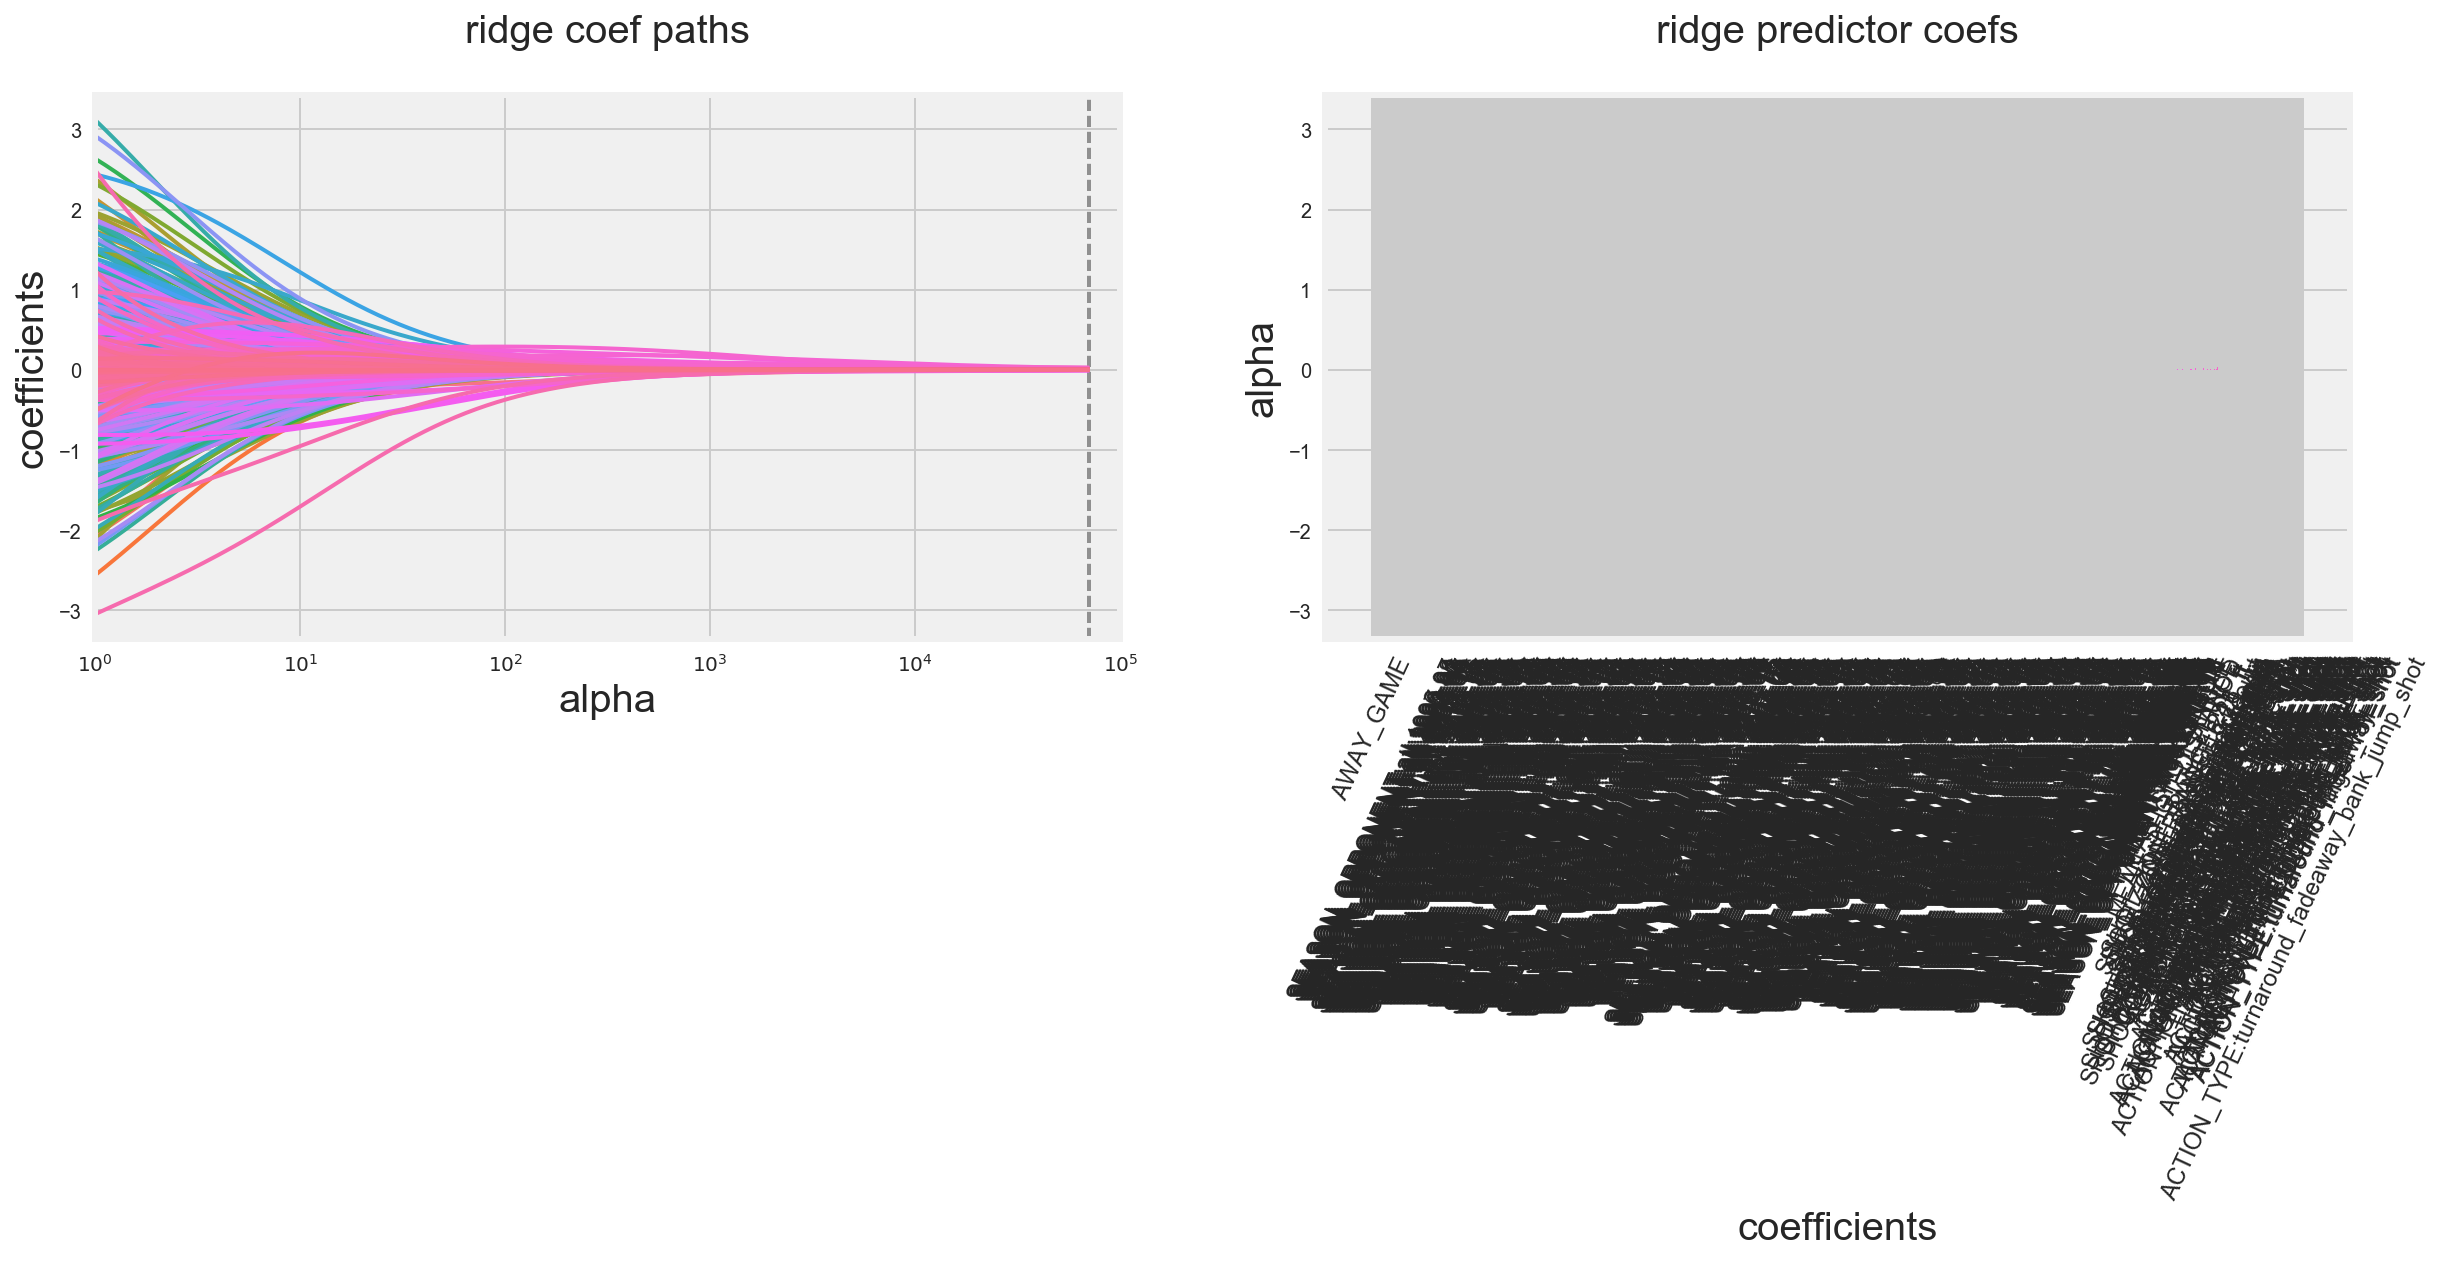

In [55]:
def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, X.columns, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.0,5.0,0.05))

In [57]:
# visualising Lasoo Plot
from sklearn.linear_model import Lasso

In [59]:
# This is the same as the ridge coefficient by alpha calculator
def lasso_coefs(x, y, alphas):
    coefs = []
    lasso_reg = Lasso()
    for a in alphas:
        lasso_reg.set_params(alpha=a)
        lasso_reg.fit(x, y)
        coefs.append(lasso_reg.coef_)
        
    return coefs

In [60]:
#Alpha values for the ridge are best visualized on a logarithmic "magnitude" scale. Essentially,
#the effect of alpha on the coefficients does not increase linearly but by orders of magnitude.


# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(x, y, r_alphas)
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(x, y, r_alphas)

In [61]:
from cycler import cycler

In [63]:
# The cycler package lets us "cycle" throug colors.
# Just another thing i had to look up on stackoverflow. That's my life.


def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coef paths\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()
    
    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(range(1, len(feature_names)+1), coefs[-1], align='center', color=colors)
    ax2.set_xticks(range(1, len(feature_names)+1))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefs\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()

In [64]:
from ipywidgets import *
from IPython.display import display
from ipywidgets import *
from IPython.display import display

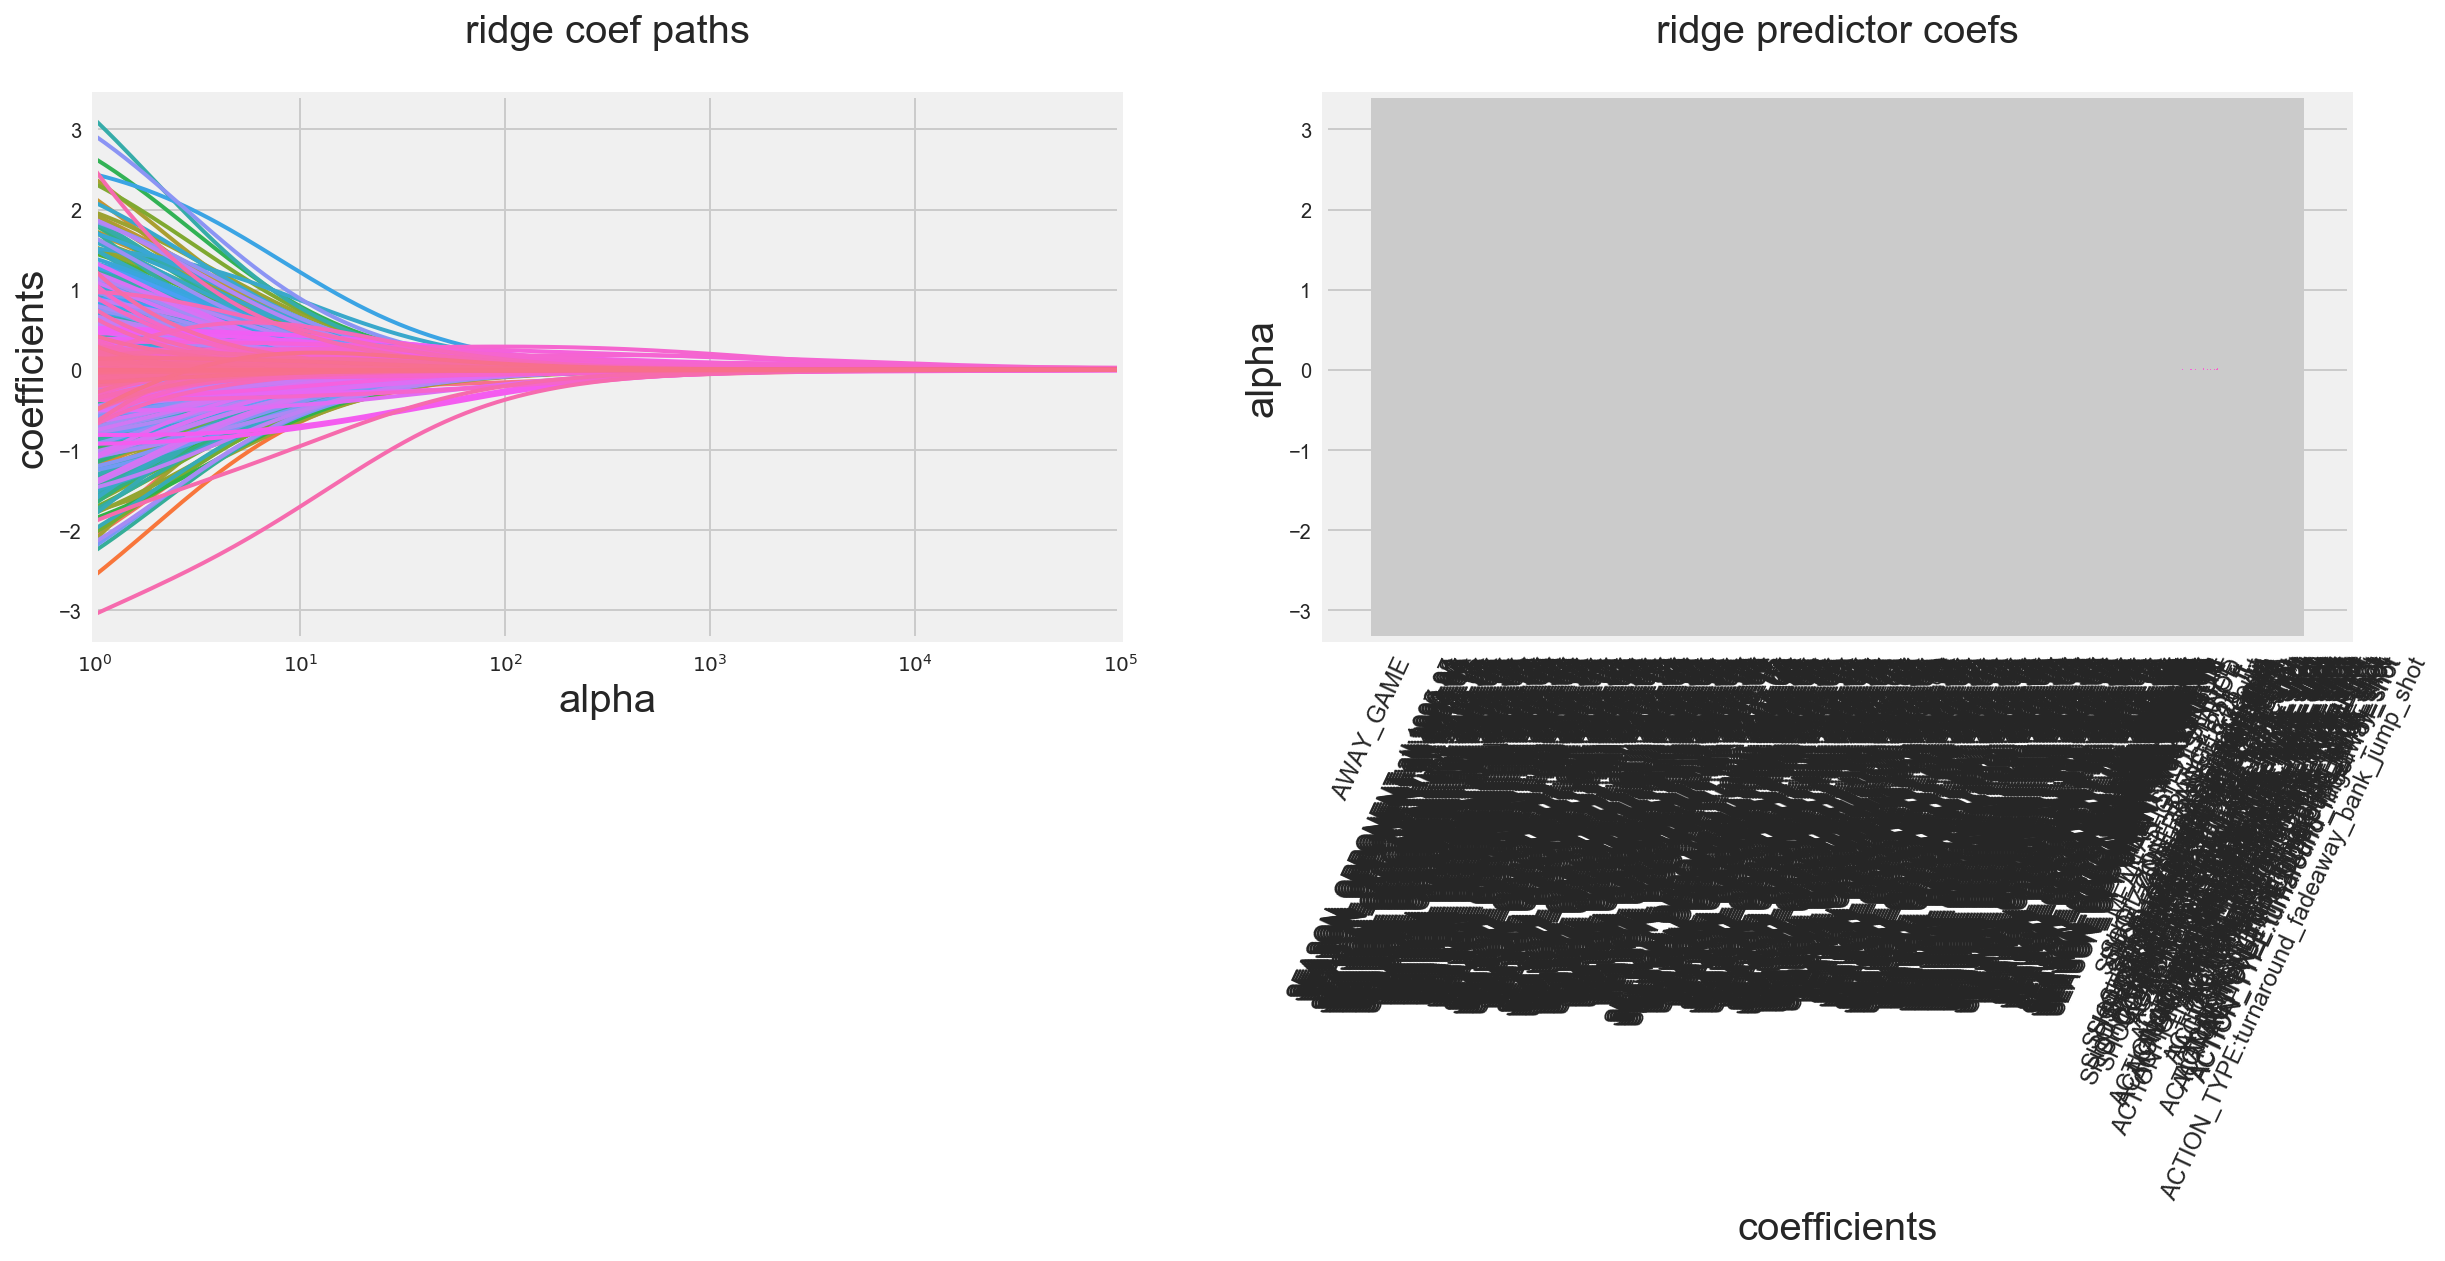

In [65]:

def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, X.columns, 10**log_of_alpha, regtype='ridge')
interact(ridge_plot_runner, log_of_alpha=(0.0,5.0,0.05))

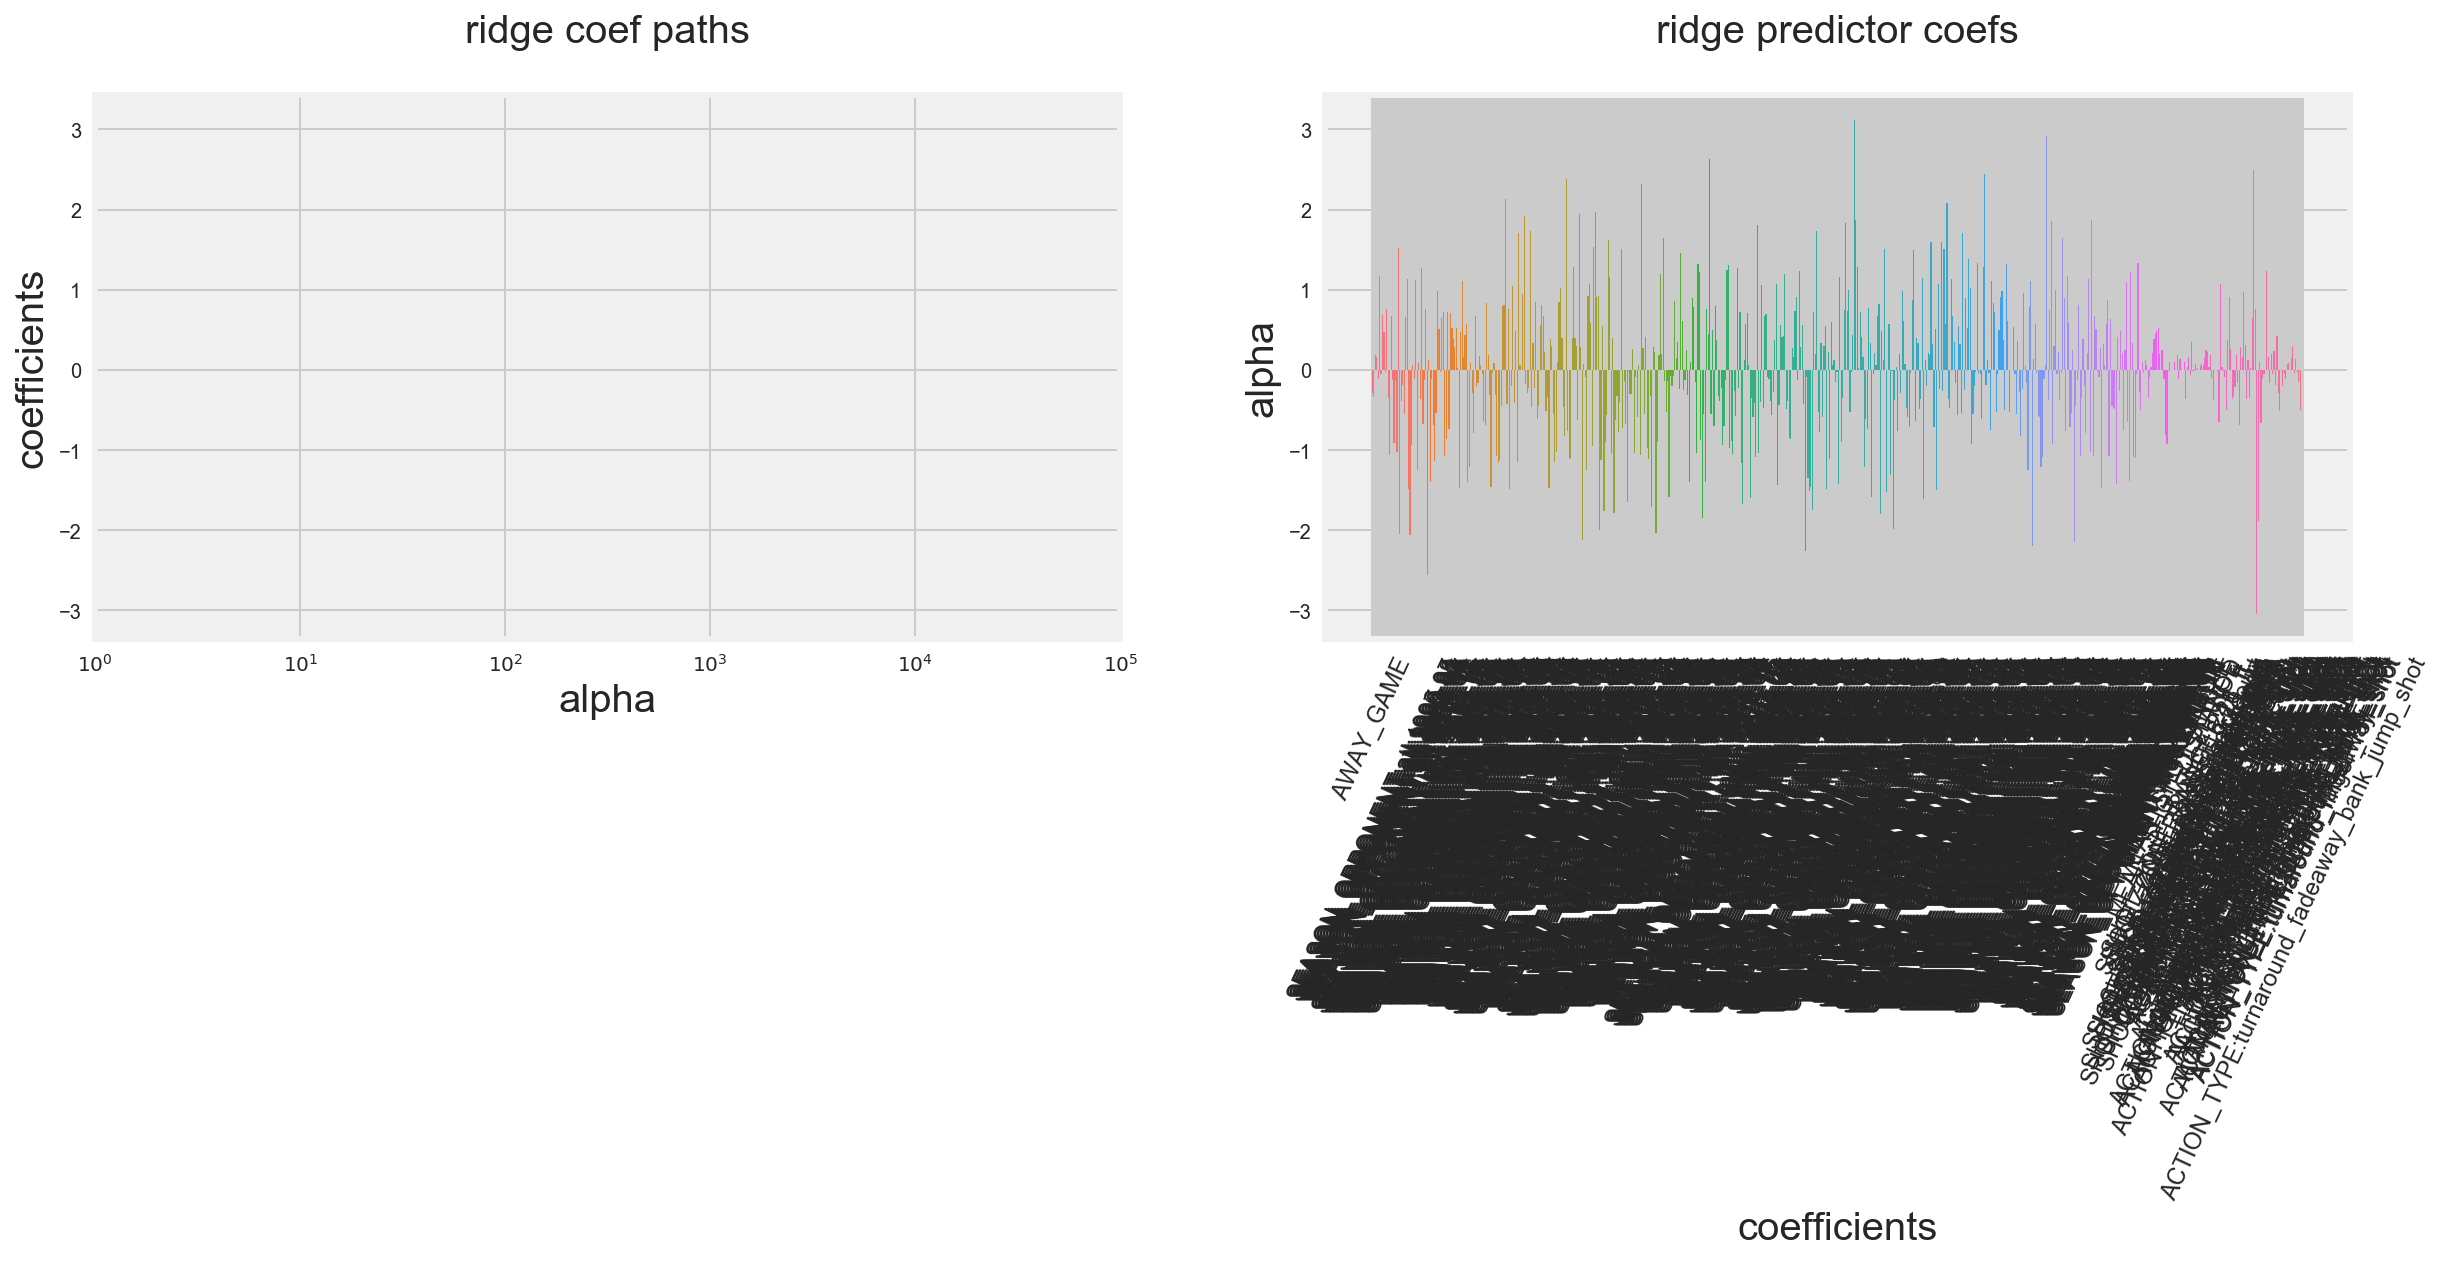

<function __main__.ridge_plot_runner>

In [66]:
def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, X.columns, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.0,5.0,0.05))